In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# simplefilter(action='ignore', category=DataConversionWarning)

In [2]:
raw_data = pd.read_csv("corn_data.csv")
raw_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1126,1127,1128,1129,1130,1131,1132,1133,1134,output
0,0,1,-1,1,1,1,0,1,-1,1,...,-1,1,-1,1,1,-1,0,0,-1,2.516485
1,1,1,-1,1,1,-1,-1,1,-1,1,...,-1,1,-1,0,1,-1,-1,1,0,1.640909
2,2,0,1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,0,0.416348
3,3,1,1,1,0,-1,1,1,-1,1,...,-1,1,-1,-1,1,-1,-1,1,0,1.338558
4,4,1,1,1,0,-1,-1,1,0,1,...,-1,1,-1,0,-1,-1,1,1,0,1.729517


In [14]:
X = raw_data.iloc[:,1:-1]
y = raw_data.iloc[:,-1:]
# print(X,y)

     0  1  2  3  4  5  6  7  8  9  ...  1125  1126  1127  1128  1129  1130  \
0    1 -1  1  1  1  0  1 -1  1 -1  ...     1    -1     1    -1     1     1   
1    1 -1  1  1 -1 -1  1 -1  1 -1  ...    -1    -1     1    -1     0     1   
2    0  1  1 -1 -1 -1  1 -1 -1 -1  ...    -1    -1     1    -1     1     1   
3    1  1  1  0 -1  1  1 -1  1  1  ...    -1    -1     1    -1    -1     1   
4    1  1  1  0 -1 -1  1  0  1 -1  ...     1    -1     1    -1     0    -1   
5    1 -1  1  1 -1 -1  1 -1  1  1  ...    -1     0     1    -1    -1    -1   
6    1  1  1  1 -1 -1  1 -1  1 -1  ...     1    -1     1    -1    -1    -1   
7    1  1  1  0 -1 -1  1  1  1 -1  ...     1    -1     1     0     0    -1   
8    1  1  0  0  0 -1  1  0  1 -1  ...     1    -1     1    -1     0     0   
9    1  1  1  1  0 -1  1  0  1 -1  ...     0    -1     1    -1     0     1   
10  -1  0  1  1  1 -1  1 -1 -1 -1  ...    -1    -1     1    -1    -1    -1   
11   1 -1  1  1 -1  1  0 -1  1 -1  ...    -1    -1     1    -1  

In [172]:
from sklearn.model_selection import train_test_split

split = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split,random_state=23)
# X_train

In [173]:
from sklearn.metrics import r2_score
# we use r2 because we are doing regression, not classification


def plot_graph(y,y_pred,title):
    fig, ax = plt.subplots()
    plt.axis([0,5,0,5])
    ax.set_title(title)
    plt.plot(y,y_pred,'o',color="black")
    plt.plot([x for x in np.arange(0,6)],[x for x in np.arange(0,6)],'r--',)
    plt.show()
    print('R2 score:',r2_score(y,y_pred))

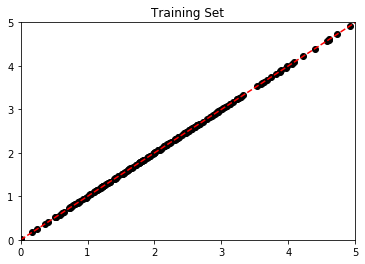

R2 score: 1.0


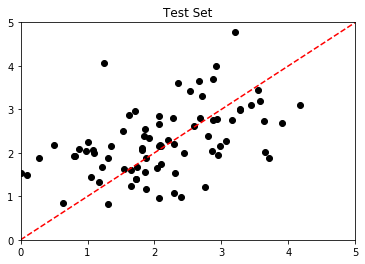

R2 score: 0.0033846703509609055


In [174]:
from sklearn.linear_model import LinearRegression

reg_ln = LinearRegression()
reg_ln.fit(X_train,y_train)
y_predict_tr = reg_ln.predict(X_train)
y_predict = reg_ln.predict(X_test)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


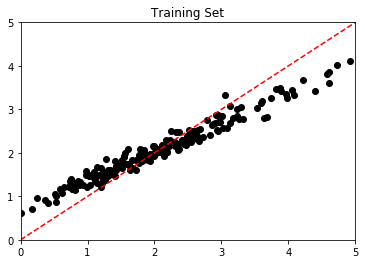

R2 score: 0.8760799450386048


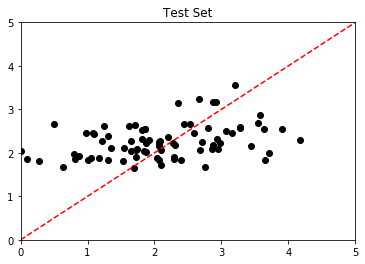

R2 score: 0.09844391641900252


<Figure size 432x288 with 0 Axes>

In [175]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train,y_train)
y_predict_tr = reg_rf.predict(X_train)
y_predict = reg_rf.predict(X_test)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")
plt.tight_layout()

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


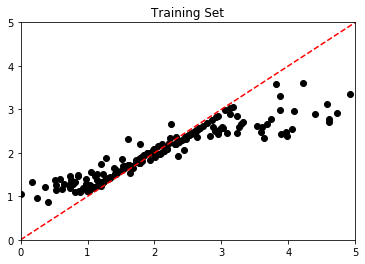

R2 score: 0.72348238350679


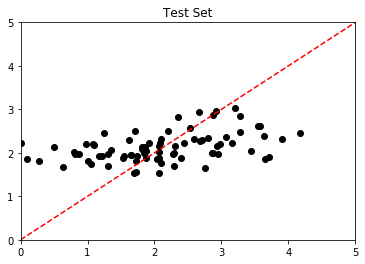

R2 score: 0.1795248050602557


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [176]:
from sklearn import svm

reg_svr = svm.SVR()
reg_svr.fit(X_train,y_train)
y_predict_tr = reg_svr.predict(X_train)
y_predict = reg_svr.predict(X_test)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")

reg_svr

In [177]:
from sklearn.model_selection import GridSearchCV



##SELECTKBEST

In [178]:
from sklearn.feature_selection import SelectKBest,f_regression

skb = SelectKBest(f_regression,k=750)

X_train_FS = skb.fit_transform(X_train, y_train)
X_test_FS = skb.transform(X_test)

print(X_train.shape,X_test.shape)
print(X_train_FS.shape,X_test_FS.shape)

(184, 1135) (80, 1135)
(184, 750) (80, 750)


C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


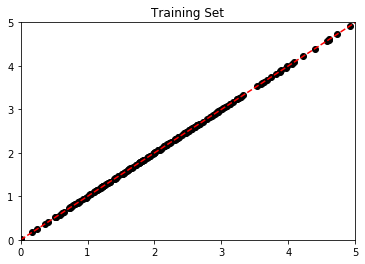

R2 score: 1.0


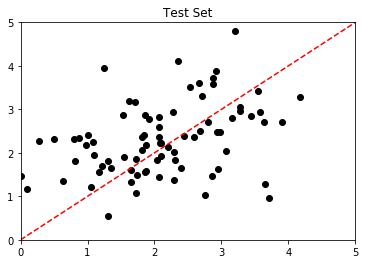

R2 score: -0.2242969557403527


In [179]:
from sklearn.linear_model import LinearRegression

reg_ln = LinearRegression()
reg_ln.fit(X_train_FS,y_train)
y_predict_tr = reg_ln.predict(X_train_FS)
y_predict = reg_ln.predict(X_test_FS)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


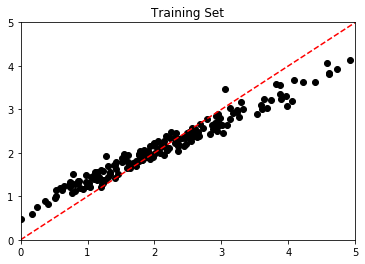

R2 score: 0.8861726377174746


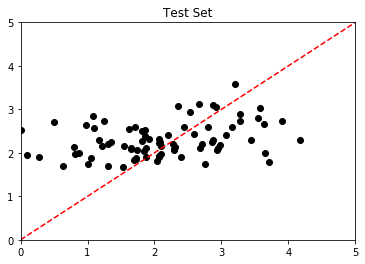

R2 score: 0.05230299424564111


<Figure size 432x288 with 0 Axes>

In [180]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train_FS,y_train)
y_predict_tr = reg_rf.predict(X_train_FS)
y_predict = reg_rf.predict(X_test_FS)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")
plt.tight_layout()

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


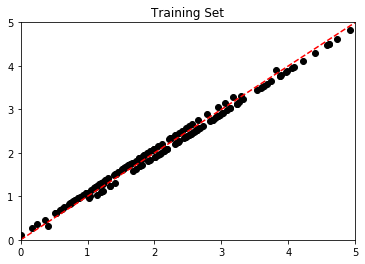

R2 score: 0.9908102162189225


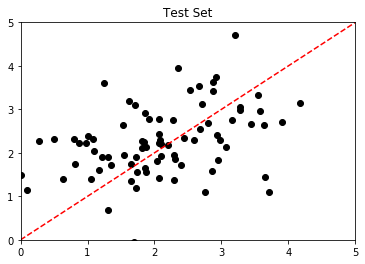

R2 score: -0.12056899943787691


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [181]:
from sklearn import svm

reg_svr = svm.SVR(kernel="linear")
reg_svr.fit(X_train_FS,y_train)
y_predict_tr = reg_svr.predict(X_train_FS)
y_predict = reg_svr.predict(X_test_FS)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")

reg_svr

In [182]:
grid = {
    'C':[10],
    'cache_size':[50,200,500,1000],
    'coef0':[-50,-10,0], 
    'degree':[1],
    'kernel':['linear','rbf']
#     gamma='auto_deprecated', 
#     kernel='linear'
}
best_svr = svm.SVR()
gd_sr = GridSearchCV(estimator=best_svr, param_grid = grid, cv = 5, iid = False)
gd_sr.fit(X_train_FS, y_train)
best_param = gd_sr.best_params_

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


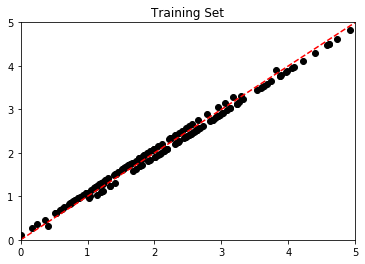

R2 score: 0.9908102162189225


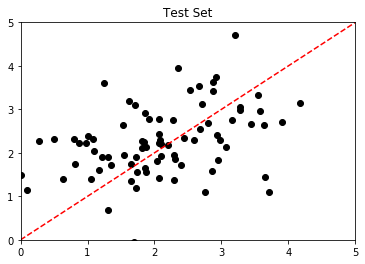

R2 score: -0.12056899943787691


In [183]:


reg_svr = svm.SVR(C=best_param["C"],
                  cache_size = best_param["cache_size"],
                  kernel = best_param["kernel"],
                  coef0= best_param['coef0'],
                  degree=best_param['degree'])

reg_svr.fit(X_train_FS,y_train)
y_predict_tr = reg_svr.predict(X_train_FS)
y_predict = reg_svr.predict(X_test_FS)
plot_graph(y_train,y_predict_tr,"Training Set")
plot_graph(y_test,y_predict,"Test Set")
